# PyData Cardiff Workshop 3 - Introduction to Pandas

![title](images/pydata_cardiff.jpg)

## Introduction to the library

Pandas is a seminal python library, which has revolutionised data analytics for the programming language. It began development in 2008 by Wes McKinney when he was working at AQR Capital Management. Initially, it was a purely in-house project, but on leaving his position, Wes was able to convince AQR to permit him to open-source the code.

If anyone is interested - the name Pandas stands for PANel Data ANalysis

Note that the usual way to import this library is to use the pattern `import pandas as pd`

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Introducing the basic data types

### The Pandas Series

A one dimensional array of information. It has similarities with a numpy array - and it can be useful to think of a series like a column of information in an Excel Spreadsheet. Similarly to the numpy array - all of the data types in a series _should_ be of the same data type.

#### Creating a simple Series - very similar to a `numpy array`

Note the present of a single integer at the end - but this will be coerced to a float.

In [3]:
ar = np.array([0.2, 1.2, 3.4, 5.6, 3.8, 6.7, 1.2, 7])
ser = pd.Series([0.2, 1.2, 3.4, 5.6, 3.8, 6.7, 1.2, 7])

In [4]:
ar.dtype

dtype('float64')

In [5]:
ser.dtype

dtype('float64')

## Note how the series deals with Mixed types

It states that they are of type `'O'` - meaning a Python object!

In [6]:
object_ser = pd.Series([1, 'hello', None, 3.4])

In [7]:
object_ser

0        1
1    hello
2     None
3      3.4
dtype: object

In [8]:
object_ser.dtype

dtype('O')

### Similar methods and functionality

There are a series of methods of the Series that share the same functionality with numpy arrays. There are called the numpy 'universal' functions `ufunc`

In [9]:
ar.mean()

3.6375

In [10]:
ser.mean()

3.6375

In [11]:
ar.sum()

29.1

In [12]:
ser.sum()

29.1

### However!

There will be some different behaviours seen! Note the different ways in which the variance is calculated.

In numpy - this is calculated as:

$$\frac{\Sigma (x - \bar{x})^{2}}{n}$$

In [13]:
ar.var()

6.039843749999999

But in the Series - this is calculated as the _unbiased_ variance, using a method called _Bessel's Correction_ by subtracting 1 from _n_

$$\frac{\Sigma (x - \bar{x})^{2}}{n - 1}$$

The effect that this has is a larger value for variance. In statistics - this has useful implications by making the variance of distributions wider, and statistical testing more rigorous.

This value can be set by chaning the _delta degrees of freedom_ argument `ddof`

In [14]:
ser.var()

6.902678571428571

In [15]:
ser.var(ddof=1)

6.902678571428571

In [16]:
ser.var(ddof=0)

6.039843749999999

We can always call the series with `.values` to get the information as a numpy array

In [17]:
isinstance(ser.values, np.ndarray)

True

## The Series Index

This is a key feature of the Series when compared with the array - and can be thought of as the name that the a row would be given if the Series was a column in a SpreadSheet.

This can be seen when we simply view the object - note that as we did not set this, the default value is the number of the row - indexed from 0

In [18]:
ar

array([0.2, 1.2, 3.4, 5.6, 3.8, 6.7, 1.2, 7. ])

In [19]:
ser

0    0.2
1    1.2
2    3.4
3    5.6
4    3.8
5    6.7
6    1.2
7    7.0
dtype: float64

In [20]:
ser.index

RangeIndex(start=0, stop=8, step=1)

This can be set at the creation of the variable - and note that we can use the values of the previous series

In [21]:
ser2 = pd.Series(data=ser.values, index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

In [22]:
ser2

a    0.2
b    1.2
c    3.4
d    5.6
e    3.8
f    6.7
g    1.2
h    7.0
dtype: float64

In this way - the series can be interacted with in a similar fashion to a dictionary

In [23]:
di = {'a': 0.2, 'g': 1.2, 'h': 7., 'b': 1.2, 'c': 3.4, 'f': 6.7, 'd': 5.6, 'e': 3.8}

In [24]:
ser[2]

3.4

In [25]:
ser2['c']

3.4

In [26]:
di['c']

3.4

However - note that there is an additional slicing ability that is not present in dictionaries

__BUT__ - take care to notice that this slicing in Pandas is __inclusive__ of the end point!!!!

In [27]:
ser2['c': 'f']

c    3.4
d    5.6
e    3.8
f    6.7
dtype: float64

## Additional functionality in the Series

A good example of this are the functions `rolling` and `expanding`. These create a type of _Window_ function - either sliding or expanding.

Note the presence of the missing values when calling these functions. In this case, the first two values are first used to calculate the third value.

In [29]:
ser2.expanding(3).mean()

a         NaN
b         NaN
c    1.600000
d    2.600000
e    2.840000
f    3.483333
g    3.157143
h    3.637500
dtype: float64

In [30]:
ser2.rolling(3).mean()

a         NaN
b         NaN
c    1.600000
d    3.400000
e    4.266667
f    5.366667
g    3.900000
h    4.966667
dtype: float64

There is also functionality to shift the data by position

In [31]:
ser2.shift(1)

a    NaN
b    0.2
c    1.2
d    3.4
e    5.6
f    3.8
g    6.7
h    1.2
dtype: float64

In [32]:
ser2.shift(-3)

a    5.6
b    3.8
c    6.7
d    1.2
e    7.0
f    NaN
g    NaN
h    NaN
dtype: float64

## Missing values - differences between numpy and pandas

One feature of numpy arrays is that the presence of missing values can have a detrimental effect when performing any `func`

Note that we __must__ use the `np.nan` (not a number) variable to create the missing value - `None` will not work

In [33]:
ar_missing = np.array([1, 2, 3, 4, np.nan, 5])

In [34]:
ar_missing

array([ 1.,  2.,  3.,  4., nan,  5.])

In [35]:
ar_missing.sum()

nan

In [36]:
ar_missing.mean()

nan

Slight difference here:

In [37]:
ar_missing.cumsum()

array([ 1.,  3.,  6., 10., nan, nan])

This has to be dealt with using the specialised functions

In [38]:
np.nansum(ar_missing)

15.0

In [39]:
np.nanmean(ar_missing)

3.0

In [40]:
np.nancumsum(ar_missing)

array([ 1.,  3.,  6., 10., 10., 15.])

In Pandas - these function __are the default!__

Also - note that we can create a missing value using `None` - it will get changed to a `NaN` automatically

In [41]:
ser_missing = pd.Series([1, 2, 3, 4, None, 5])

In [42]:
ser_missing

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
5    5.0
dtype: float64

In [43]:
ser_missing.sum()

15.0

In [44]:
ser_missing.mean()

3.0

This one is slightly different!

In [45]:
ser_missing.cumsum()

0     1.0
1     3.0
2     6.0
3    10.0
4     NaN
5    15.0
dtype: float64

## Dealing with missing values

Missing values are a common feature of using real datasets. 4 examples of how to deal with these are shown here.

1. Replacing the missing value with a stated replacement
2. Backfilling the data from later/lower
3. Forward filling the data from earlier/higher
4. Just drop them entirely!

In [46]:
ser_missing_start = ser2.shift(3)

In [47]:
ser_missing_start

a    NaN
b    NaN
c    NaN
d    0.2
e    1.2
f    3.4
g    5.6
h    3.8
dtype: float64

In [48]:
ser_missing_start.fillna(-999)

a   -999.0
b   -999.0
c   -999.0
d      0.2
e      1.2
f      3.4
g      5.6
h      3.8
dtype: float64

Remember that missing numbers won't affect the mean calculation in Pandas

In [49]:
ser_missing_start.fillna(ser_missing_start.mean())

a    2.84
b    2.84
c    2.84
d    0.20
e    1.20
f    3.40
g    5.60
h    3.80
dtype: float64

In [50]:
ser_missing_start.bfill()

a    0.2
b    0.2
c    0.2
d    0.2
e    1.2
f    3.4
g    5.6
h    3.8
dtype: float64

In [51]:
ser_missing_end = ser2.shift(-3)

In [52]:
ser_missing_end

a    5.6
b    3.8
c    6.7
d    1.2
e    7.0
f    NaN
g    NaN
h    NaN
dtype: float64

In [53]:
ser_missing_end.ffill()

a    5.6
b    3.8
c    6.7
d    1.2
e    7.0
f    7.0
g    7.0
h    7.0
dtype: float64

In [54]:
ser_missing_end.dropna()

a    5.6
b    3.8
c    6.7
d    1.2
e    7.0
dtype: float64

# Moving to the DataFrame

This is really the main datatype in Pandas. Think of one as a collection of Series objects - all sharing the same index.

A dataframe can be created using a variety of methods - only a few of which will be shown here.

Using a dictionary. However in order to maintain the desired column order - we will be using an `OrderedDict` here

In [55]:
from collections import OrderedDict

In [56]:
data1 = OrderedDict({
    'col1': [1, 2, 3, 4],
    'col2': [4, 5, 6, 7]
})

In [57]:
df1 = pd.DataFrame(data1)

In [58]:
df1

,col1,col2
0,1,4
1,2,5
2,3,6
3,4,7


Using a numpy array, with column information

In [59]:
data2 = np.array([
    [1, 4],
    [2, 5],
    [3, 6],
    [4, 7]
])

In [60]:
data2

array([[1, 4],
       [2, 5],
       [3, 6],
       [4, 7]])

In [61]:
df2 = pd.DataFrame(data2, columns=['col1', 'col2'])

In [62]:
df2

,col1,col2
0,1,4
1,2,5
2,3,6
3,4,7


In a similar fashion to a series - we can use `.values` to get the data as a numpy array

In [63]:
df2.values

array([[1, 4],
       [2, 5],
       [3, 6],
       [4, 7]])

The index can also be set at creation

In [64]:
df3 = pd.DataFrame(data1, index=['a', 'b', 'c', 'd'])

In [65]:
df3

,col1,col2
a,1,4
b,2,5
c,3,6
d,4,7


Note that the columns and index __must__ be of the correct length, or you will get an error!

In [66]:
# err = pd.DataFrame(data1, index=['a', 'b', 'c'])

## Adding and selecting data

If we wish to add a column of information to the dataframe, we can use dictionary-like `[]`, just as long as the length of the value being assigned is of the correct length.

In [67]:
df3['col3'] = [4, 3, 2, 1]
df3['col4'] = [101, 102, 103, 104]
df3['col5'] = [-1, -2, -3, -4]

In [68]:
df3

,col1,col2,col3,col4,col5
a,1,4,4,101,-1
b,2,5,3,102,-2
c,3,6,2,103,-3
d,4,7,1,104,-4


We can also use the `[]` notation to obtain a single series back from the dataframe, using the column name

In [69]:
col2_series = df3['col2']

In [70]:
col2_series

a    4
b    5
c    6
d    7
Name: col2, dtype: int64

In [71]:
type(col2_series)

pandas.core.series.Series

## Using double brackets - `[[]]`

A very important feature to learn is that, while the `[]` notation returned a series, if we use double square brackets, then we do not get a series... but a __dataframe__

In [72]:
col2_df = df3[['col2']]

In [73]:
col2_df

,col2
a,4
b,5
c,6
d,7


In [74]:
type(col2_df)

pandas.core.frame.DataFrame

As dataframes do not need to be 1D - we can use this method to select multiple columns

In [75]:
df3[['col1', 'col3']]

,col1,col3
a,1,4
b,2,3
c,3,2
d,4,1


## Using conditional statements to select information

* This can include either single - or multiple statements
* But note the syntax for how multiple statements are used

In [76]:
df3[df3['col1'] > 1]

,col1,col2,col3,col4,col5
b,2,5,3,102,-2
c,3,6,2,103,-3
d,4,7,1,104,-4


In [77]:
df3[(df3['col1'] > 1) & (df3['col2'] >= 6)]

,col1,col2,col3,col4,col5
c,3,6,2,103,-3
d,4,7,1,104,-4


## Using the `.iloc` and `.loc` notation

This is often the preferred method of selecting data. It can seem a little strange - but this will hopefully break it down

* We use `loc` for using identifiers present in the index
* We use `iloc` when getting the numbers of the rows - indexed from 0
    * Of course - if the index is the default of row numbers - then this will be the same!
* The earlier feature of `[]` for series and `[[]]` still holds!

Of note - you will sometime see the func `ix` used in some older text - this has now been deprecated

In [78]:
df3.loc['a']

col1      1
col2      4
col3      4
col4    101
col5     -1
Name: a, dtype: int64

In [79]:
df3.iloc[0]

col1      1
col2      4
col3      4
col4    101
col5     -1
Name: a, dtype: int64

In [80]:
df3.loc[['a']]

,col1,col2,col3,col4,col5
a,1,4,4,101,-1


In [81]:
df3.iloc[[0]]

,col1,col2,col3,col4,col5
a,1,4,4,101,-1


## Selecting column  as well!

Note that this will return the value that appears in a particular cell

In [82]:
df3.loc['a', 'col3']

4

## Slicing

Using this method - we can use slicing for both rows and columns

In [83]:
df3.loc['a': 'd', 'col2': 'col4']

,col2,col3,col4
a,4,4,101
b,5,3,102
c,6,2,103
d,7,1,104


# The `SettingWithCopy` warning!

This will soon become the bane of your life when working with Pandas dataframes!

Here I will try to explain it as best as I can!

In [84]:
df4 = df3.copy()

In [85]:
df4

,col1,col2,col3,col4,col5
a,1,4,4,101,-1
b,2,5,3,102,-2
c,3,6,2,103,-3
d,4,7,1,104,-4


In [86]:
df4['a': 'c']['col2']

a    4
b    5
c    6
Name: col2, dtype: int64

In [87]:
df4['a': 'c']['col2'] = [32, 31, 30]

/Users/tim/miniconda3/envs/pydata_cardiff_workshop3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


It has still worked though!

In [88]:
df4

,col1,col2,col3,col4,col5
a,1,32,4,101,-1
b,2,31,3,102,-2
c,3,30,2,103,-3
d,4,7,1,104,-4


In [89]:
df4 = df3.copy()

Using `loc`, we avoid this error!

In [90]:
df4.loc['a': 'c', 'col2'] = [32, 31, 30]

In [91]:
df4

,col1,col2,col3,col4,col5
a,1,32,4,101,-1
b,2,31,3,102,-2
c,3,30,2,103,-3
d,4,7,1,104,-4


### Now - this seems to work here

In [92]:
df5 = df4.loc['a': 'c', ['col1', 'col3', 'col5']]

In [93]:
df5

,col1,col3,col5
a,1,4,-1
b,2,3,-2
c,3,2,-3


In [94]:
df5.loc['a', 'col3'] = 9999

In [95]:
df6 = df4.loc['b': 'd', :]

In [96]:
df6.loc['a', 'col3'] = 9999

### Just observe how irritating this is!

This really looks the same to me!

In [97]:
warning_data = {'one': np.arange(1, 11), 'two': np.arange(11, 21)}   

In [98]:
warning_df = pd.DataFrame(warning_data)

In [99]:
warning_df

,one,two
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16
6,7,17
7,8,18
8,9,19
9,10,20


In [100]:
warning_df2 = warning_df.loc[3:5, :] 

In [101]:
warning_df2

,one,two
3,4,14
4,5,15
5,6,16


In [102]:
warning_df2.loc[4, 'one'] = 99 

/Users/tim/miniconda3/envs/pydata_cardiff_workshop3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/tim/miniconda3/envs/pydata_cardiff_workshop3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
warning_df

,one,two
0,1,11
1,2,12
2,3,13
3,4,14
4,99,15
5,6,16
6,7,17
7,8,18
8,9,19
9,10,20


### Just make a copy!

In [104]:
no_warning_df = pd.DataFrame(warning_data)

In [105]:
no_warning_df2 = no_warning_df.loc[3:5, :].copy()

In [106]:
no_warning_df2.loc[4, 'one'] = 99 

In [107]:
no_warning_df2

,one,two
3,4,14
4,99,15
5,6,16


In [108]:
no_warning_df

,one,two
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16
6,7,17
7,8,18
8,9,19
9,10,20


#### This is admittedly confusing! For a more detailed explanation - see [this blog](https://www.dataquest.io/blog/settingwithcopywarning/)

# Loading in data

This is probably the most important part of the workshop, as it will be one of the most common processes that you will __always__ do when carrying out data analysis. For this, we will look at loading in data from both a comma-separated-value file `.csv` and Excel files (other methods can include reading in streaming data - or information from relational databases). The format that you will probably be working with most is `.csv`. This is done using the following methods:

* `pd.read_csv()`
* `pd.read_excel()`
    * Note that to use this - you must install the `xlrd` library to read
    * And the `openpyxl` (together with its dependencies) to write data (use `pip` or `conda`)
        * But we won't be using that here!

This quickly can get more complicated that it initially sounds - a quick look at the documentation for these functions shows that! This is because of all of the potential problems that have to be considered when _parsing_ data from an external source. We do not have time to cover all of these, but a few of the features will be explained.

## Loading data from a _clean_ `.csv` file

* Note that this dataset does not have any index information - so one will be made with the row numbers indexed from 0
* Also - the file does not _have_ to separated by commas - if any other punctuation is use (like `;`), then this can be specified with the `delimiter` or `sep` argument (they do exactly the same thing - violation of the Zen of Python!)
    * If you know that your columns are segregated by spaces - or any other form of whitespace - then use the `delim_whitespace = True` in the function call

In [109]:
!head -n 5 data/iris.csv

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa


In [110]:
iris_csv = pd.read_csv('data/iris.csv')

# This is just the same as:
# iris_csv = pd.read_csv('data', delimiter=',')

### Examining the data with `.head()` and `.tail()`

Probably the most used function that you will ever learn in Pandas is `head()`, which allows us to see the first 5 rows of data by default - but this number can be changed.

`tail()` has similar functionality - but shows the end of the dataframe rather than the top

In [111]:
iris_csv.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [112]:
iris_csv.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [113]:
iris_csv.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


## Reading in from Excel

Here - the syntax is very similar, but note that as the file in question has multiple sheets - we can specify the sheet name of interest

In [114]:
diamonds = pd.read_excel('data/iris_and_diamonds.xlsx', sheet_name='diamonds')

In [115]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Loading in some _problematic_ data!

This file has 2 lines of junk information at the top of it - you will sometimes get it when downloading from certain sites - as they like to put it in there for identification purposes - and to make our work more interesting/unbelievably-irritating!

In [116]:
!head -n 5 data/iris_problem.csv

Here are 2 lines
of problem information!
sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa


In [118]:
iris_csv2 = pd.read_csv('data/iris_problem.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 5


In [ ]:
iris_csv2 = pd.read_csv('data/iris_problem.csv', skiprows=2)

## Writing out the data

If we want to save our data into a text file - we can use the `to_csv()` function. The main thing to be careful of here is to make sure that you specify whether you want the index to be saved or not. by default - it will be, so if you don't have any meaningful information there, be sure to set it to False!

In [ ]:
iris_csv2.to_csv('iris_with_index.csv')

In [ ]:
iris_csv2.to_csv('iris_no_index.csv', index=False)

In reality though - we could probably just delete this in the text file before we load it in!

# Useful information functions

We will now look at 2 functions that can be used to get some summary information on the dataframes - we will stay with the iris dataset that we have loaded in already

## `info`

This will give us basic information about:

* The number of entries
* The number of missing values
* The data type of each column/series

In [ ]:
iris_csv.info()

## `describe`

This gives us a basic statistical summary of the data

* Note that by default - it will only include the numerical information
* If we want information on any `object` or 'categorical' columns - we need to include `include='all'` in the arguments

In [ ]:
iris_csv.describe()

In [ ]:
iris_csv.describe(include='all')

# Aggregating information

This is where the power of Pandas really comes into play. We can start performing database style operations on our data. Before Pandas - this was a particular headache!

Here, we will be using the values in the `species` column to get aggregated values of the information in the numerical columns. This is referred to as a __Group By__ operation.

Note that just calling a `groupby` returns a new type of object - this is because we have only _primed_ pandas to anticipate that we wish to do something with the grouping:

In [ ]:
iris_csv.groupby('species')

In this first example - we will take the average value of all of the numerical column by species. Note that the information that was in the species column __is now the index of the new dataframe!!!__

In [ ]:
iris_mean = iris_csv.groupby('species').mean()

In [ ]:
iris_mean

### In built functions

Notice that we only had to call the `mean` function on the grouped data, we can also use a variety of different methods

In [119]:
iris_sum = iris_csv.groupby('species').sum()
iris_sum

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [120]:
iris_std = iris_csv.groupby('species').std()
iris_std

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.379064,0.173664,0.105386
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


## Using the generic `agg`

These are all suitable to do something that is built in, but if we wish to do something more complicated - then we have to use the generic `agg` method (aggregation)

In this first instance - we are performing multiple aggregations, and we now see the first example of a multi level column. We will be looking at how to deal with these soon

In [121]:
iris_mean_sum = iris_csv.groupby('species').agg(['mean', 'sum'])
iris_mean_sum

sepal_length        sepal_width        petal_length         \
                   mean    sum        mean    sum         mean    sum   
species                                                                 
setosa            5.006  250.3       3.428  171.4        1.462   73.1   
versicolor        5.936  296.8       2.770  138.5        4.260  213.0   
virginica         6.588  329.4       2.974  148.7        5.552  277.6   

           petal_width         
                  mean    sum  
species                        
setosa           0.246   12.3  
versicolor       1.326   66.3  
virginica        2.026  101.3

## Using different aggregations for different columns

Here - we are interested in having different types of aggregations for different columns. We will look at calculating:

* The mean of the `sepal_length` per species
* The sum of the `sepal_width` per species

In order to do this, we pass in dictionaries. However, in the first case, note that we are losing the vital information about the levels of aggretation that are being performed:

In [122]:
iris_csv.groupby('species').agg({'sepal_length': 'mean', 'sepal_width': 'sum'})

,sepal_length,sepal_width
species,,
setosa,5.006,171.4
versicolor,5.936,138.5
virginica,6.588,148.7


#### This is a quirk of using Pandas

In order to get around this - we need to enter in the aggregations that we want using lists. This way, we end up with having the multi level columns again

In [123]:
iris_csv.groupby('species').agg({'sepal_length': ['mean'], 'sepal_width': ['sum']})

,sepal_length,sepal_width
,mean,sum
species,,
setosa,5.006,171.4
versicolor,5.936,138.5
virginica,6.588,148.7


#### Getting rid of the multi levels

Here is a neat trick that you can use if you do not wish to have the multi levels. We will also add in some standard deviation info as well:

In [124]:
multi_agg_df = iris_csv.groupby('species').agg({'sepal_length': ['mean'], 'sepal_width': ['sum', 'std']})

In [125]:
multi_agg_df.columns

MultiIndex([('sepal_length', 'mean'),
            ( 'sepal_width',  'sum'),
            ( 'sepal_width',  'std')],
           )

In [126]:
multi_agg_df.columns = ['_'.join(x) for x in multi_agg_df.columns.ravel()]

In [127]:
multi_agg_df

,sepal_length_mean,sepal_width_sum,sepal_width_std
species,,,
setosa,5.006,171.4,0.379064
versicolor,5.936,138.5,0.313798
virginica,6.588,148.7,0.322497


#### Custom aggregations

We do not have to rely on using built in aggregations on our grouped data. We can also use _anonymous_ functions, which in Python are called using `lambda`

Here we calculate the mean of values greater than 1

In [128]:
iris_csv.groupby('species').agg(lambda x: x[x > 1].mean())

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.471429,NaN
versicolor,5.936,2.770,4.260000,1.37907
virginica,6.588,2.974,5.552000,2.02600


#### But the column names!

Another Pandas quirk here - if we want to add in the information about our custom aggregation - we need to pass in a __list of tuples!!__

In [129]:
iris_csv.groupby('species').agg([('mean > 1', lambda x: x[x > 1].mean())])

,sepal_length,sepal_width,petal_length,petal_width
,mean > 1,mean > 1,mean > 1,mean > 1
species,,,,
setosa,5.006,3.428,1.471429,NaN
versicolor,5.936,2.770,4.260000,1.37907
virginica,6.588,2.974,5.552000,2.02600


## Pivot Tables

Here is a quick example of a common piece of functionality that is often used in Excel - the Pivot Table.

This is another way of aggregating data - but note now that the dataframe is transposed from what was there before.

In [130]:
iris_csv.pivot_table(columns='species', aggfunc='sum')

species,setosa,versicolor,virginica
petal_length,73.1,213.0,277.6
petal_width,12.3,66.3,101.3
sepal_length,250.3,296.8,329.4
sepal_width,171.4,138.5,148.7


We can also use lists to keep the information in multi level columns - and perform multiple types of aggregation as well.

In [131]:
iris_csv.pivot_table(columns='species', aggfunc=['mean'])

mean                     
species      setosa versicolor virginica
petal_length  1.462      4.260     5.552
petal_width   0.246      1.326     2.026
sepal_length  5.006      5.936     6.588
sepal_width   3.428      2.770     2.974

In [132]:
iris_csv.pivot_table(columns='species', aggfunc=['mean', 'sum'])

mean                         sum                     
species      setosa versicolor virginica setosa versicolor virginica
petal_length  1.462      4.260     5.552   73.1      213.0     277.6
petal_width   0.246      1.326     2.026   12.3       66.3     101.3
sepal_length  5.006      5.936     6.588  250.3      296.8     329.4
sepal_width   3.428      2.770     2.974  171.4      138.5     148.7

In [133]:
iris_pivot = iris_csv.pivot_table(columns='species', aggfunc=['mean', 'sum'])
iris_pivot

mean                         sum                     
species      setosa versicolor virginica setosa versicolor virginica
petal_length  1.462      4.260     5.552   73.1      213.0     277.6
petal_width   0.246      1.326     2.026   12.3       66.3     101.3
sepal_length  5.006      5.936     6.588  250.3      296.8     329.4
sepal_width   3.428      2.770     2.974  171.4      138.5     148.7

#### Another column hack!

Notice the reordering of the levels - the `[::-1]` slice means 'traverse from the end to the start'

Don't worry if you are not familiar with this!

In [134]:
iris_pivot.columns = ['_'.join(x[::-1]) for x in iris_pivot.columns.ravel()]

In [135]:
iris_pivot

,setosa_mean,versicolor_mean,virginica_mean,setosa_sum,versicolor_sum,virginica_sum
petal_length,1.462,4.260,5.552,73.1,213.0,277.6
petal_width,0.246,1.326,2.026,12.3,66.3,101.3
sepal_length,5.006,5.936,6.588,250.3,296.8,329.4
sepal_width,3.428,2.770,2.974,171.4,138.5,148.7


In [136]:
li = [1, 2, 3, 4]

In [137]:
li

[1, 2, 3, 4]

In [138]:
li[:]

[1, 2, 3, 4]

In [139]:
li[::]

[1, 2, 3, 4]

In [140]:
li[::1]

[1, 2, 3, 4]

In [141]:
li[::-1]

[4, 3, 2, 1]

# Multi Level GroupBys

Here, we will show that we can use the `groupby` on multiple levels. The iris dataset is not suitable for this as it only has the species column to perform any meaningfull operations on. So we will use the diamonds data that we loaded in from Excel earlier.

Here, I was to get the mean value of all the numerical columns based on the 2 columns:

* `cut`
* `clarity`

In [142]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Note that we now get a `MultiIndex`!

In [143]:
diamonds_mean = diamonds.groupby(['cut', 'clarity']).mean()

In [144]:
diamonds_mean

carat      depth      table        price         x  \
cut       clarity                                                          
Fair      I1       1.361000  65.699048  58.114286  3703.533333  6.723000   
          IF       0.474444  60.066667  59.111111  1912.333333  5.050000   
          SI1      0.964632  63.910294  59.126961  4208.279412  6.127230   
          SI2      1.203841  64.421888  58.828326  5173.916309  6.570343   
          VS1      0.879824  62.945294  60.365294  4165.141176  5.932353   
          VS2      0.885249  63.637548  59.050958  4174.724138  5.966590   
          VVS1     0.664706  60.417647  61.235294  3871.352941  5.503529   
          VVS2     0.691594  62.847826  59.237681  3349.768116  5.495507   
Good      I1       1.203021  62.067708  59.497917  3596.635417  6.651562   
          IF       0.616338  61.440845  59.056338  4098.323944  5.278310   
          SI1      0.830397  62.696346  58.430962  3689.533333  5.799776   
          SI2      1.035227  62.242831  58.924977  4580.260870  6.272414   
          VS1      0.757685  62.018673  58.775772  3801.445988  5.636852   
          VS2      0.850787  62.363292  58.664826  4262.236196  5.863262   
          VVS1     0.502312  62.123118  58.922581  2254.774194  4.926290   
          VVS2     0.614930  62.311538  58.672727  3079.108392  5.246154   
Ideal     I1       1.222671  61.648630  56.102740  4335.726027  6.751712   
          IF       0.455041  61.645710  55.707013  2272.913366  4.827261   
          SI1      0.801808  61.737482  56.061023  3752.118169  5.781287   
          SI2      1.007925  61.701001  56.120516  4755.952656  6.262621   
          VS1      0.674714  61.706436  55.894037  3489.744497  5.449746   
          VS2      0.670566  61.730901  55.931256  3284.550385  5.428111   
          VVS1     0.495960  61.679091  55.839912  2468.129458  4.960596   
          VVS2     0.586213  61.690714  55.915848  3250.290100  5.214693   
Premium   I1       1.287024  61.183415  59.068293  3947.331707  6.842098   
          IF       0.603478  61.047826  58.730435  3856.143478  5.234957   
          SI1      0.908601  61.303329  58.758993  4455.269371  6.045410   
          SI2      1.144161  61.178976  58.779654  5545.936928  6.569495   
          VS1      0.793308  61.318451  58.690397  4485.462041  5.738049   
          VS2      0.833774  61.283408  58.754155  4550.331248  5.834665   
          VVS1     0.534821  61.260877  58.674513  2831.206169  5.037955   
          VVS2     0.654724  61.280230  58.654483  3795.122989  5.390920   
Very Good I1       1.281905  61.755952  59.372619  4078.226190  6.800119   
          IF       0.618769  61.363806  57.455224  4396.216418  5.293097   
          SI1      0.845978  61.947222  58.014907  3932.391049  5.869244   
          SI2      1.064338  61.862952  58.251571  4988.688095  6.365814   
          VS1      0.733307  61.729127  57.822197  3805.353239  5.575758   
          VS2      0.811181  61.849247  57.958665  4215.759552  5.769097   
          VVS1     0.494588  61.675919  57.622687  2459.441065  4.895513   
          VVS2     0.566389  61.660972  57.712308  3037.765182  5.083004   

                          y         z  
cut       clarity                      
Fair      I1       6.624238  4.386905  
          IF       5.050000  3.033333  
          SI1      6.071985  3.895711  
          SI2      6.503927  4.211867  
          VS1      5.864059  3.709882  
          VS2      5.907011  3.780230  
          VVS1     5.508824  3.327647  
          VVS2     5.464638  3.444058  
Good      I1       6.614792  4.065625  
          IF       5.315070  3.252958  
          SI1      5.809974  3.635064  
          SI2      6.276577  3.895245  
          VS1      5.657176  3.499954  
          VS2      5.878395  3.658231  
          VVS1     4.950806  3.068602  
          VVS2     5.269406  3.273497  
Ideal     I1       6.736712  4.158493  
          IF       4.850289  2.982211  
          SI1      5.791226  

## Getting information from `MultiIndex`

This can be quite a difficult topic, and is a bit more advanced, but I wanted to show you here as a future reference.

1. Drop the index and then use `loc`

In [145]:
diamonds_mean2 = diamonds_mean.reset_index()
diamonds_mean2.loc[diamonds_mean2['cut'] == 'Fair']

,cut,clarity,carat,depth,table,price,x,y,z
0,Fair,I1,1.361000,65.699048,58.114286,3703.533333,6.723000,6.624238,4.386905
1,Fair,IF,0.474444,60.066667,59.111111,1912.333333,5.050000,5.050000,3.033333
2,Fair,SI1,0.964632,63.910294,59.126961,4208.279412,6.127230,6.071985,3.895711
3,Fair,SI2,1.203841,64.421888,58.828326,5173.916309,6.570343,6.503927,4.211867
4,Fair,VS1,0.879824,62.945294,60.365294,4165.141176,5.932353,5.864059,3.709882
5,Fair,VS2,0.885249,63.637548,59.050958,4174.724138,5.966590,5.907011,3.780230
6,Fair,VVS1,0.664706,60.417647,61.235294,3871.352941,5.503529,5.508824,3.327647
7,Fair,VVS2,0.691594,62.847826,59.237681,3349.768116,5.495507,5.464638,3.444058


2. We can use `xs` to get a cross section. But note that this can only be used on single levels within the index

In [146]:
diamonds_mean.xs('Fair', level='cut')

,carat,depth,table,price,x,y,z
clarity,,,,,,,
I1,1.361000,65.699048,58.114286,3703.533333,6.723000,6.624238,4.386905
IF,0.474444,60.066667,59.111111,1912.333333,5.050000,5.050000,3.033333
SI1,0.964632,63.910294,59.126961,4208.279412,6.127230,6.071985,3.895711
SI2,1.203841,64.421888,58.828326,5173.916309,6.570343,6.503927,4.211867
VS1,0.879824,62.945294,60.365294,4165.141176,5.932353,5.864059,3.709882
VS2,0.885249,63.637548,59.050958,4174.724138,5.966590,5.907011,3.780230
VVS1,0.664706,60.417647,61.235294,3871.352941,5.503529,5.508824,3.327647
VVS2,0.691594,62.847826,59.237681,3349.768116,5.495507,5.464638,3.444058


In [147]:
diamonds_mean.xs('IF', level='clarity')

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,0.474444,60.066667,59.111111,1912.333333,5.050000,5.050000,3.033333
Good,0.616338,61.440845,59.056338,4098.323944,5.278310,5.315070,3.252958
Ideal,0.455041,61.645710,55.707013,2272.913366,4.827261,4.850289,2.982211
Premium,0.603478,61.047826,58.730435,3856.143478,5.234957,5.220870,3.191478
Very Good,0.618769,61.363806,57.455224,4396.216418,5.293097,5.334403,3.259813


In [148]:
diamonds_mean.xs(('Good', 'VS2'), level=('cut', 'clarity'))

,,carat,depth,table,price,x,y,z
cut,clarity,,,,,,,
Good,VS2,0.850787,62.363292,58.664826,4262.236196,5.863262,5.878395,3.658231


3. For multiple levels in multiple columns - we need to use an `IndexSlice` - __this is complicated!__

In [149]:
idx = pd.IndexSlice

In [150]:
diamonds_mean.loc[idx[['Good', 'Fair'], ['IF', 'SI1']], ['depth', 'price']]

depth        price
cut  clarity                        
Fair IF       60.066667  1912.333333
     SI1      63.910294  4208.279412
Good IF       61.440845  4098.323944
     SI1      62.696346  3689.533333

# Time Series data and Plotting from Pandas

As the origins of Pandas are in the financial sector, there is a large amount of functionality for time based data. In this type of data, the index  really starts to play a key role, and becuase a `DatetimeIndex`.

In order to illustrate this, we will be loading in some financial data that was downloaded from Yahoo Finance. It is the Open/High/Low/Close data from Tesla for the past year.

Note that we are now specifying the column to use as an index. However - this is not enough to ensure a `DatetimeIndex`

In [151]:
tsla = pd.read_csv('data/TSLA.csv', index_col='Date')

In [152]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2018-10-05 to 2019-10-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB


## `parse_dates`

The following command instructs Pandas to read in data as dates - if this can be done.

In this situation it works, as the data is formatted so that it can be easily read in as a date. However, if this information was more bespoke, then you will have to set a value for the `date_parser` argument using additional information from the `datetime` built in Python library. However, this is outside of the scope of this workshop.

In [153]:
tsla = pd.read_csv('data/TSLA.csv', index_col='Date', parse_dates=True)

In [154]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-10-05 to 2019-10-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


## Plotting the information

When working in a notebook - be sure that you have set `%matplotlib inline` before you do any plotting.

After this is done - to plot a Pandas series, simply call the `plot` function.

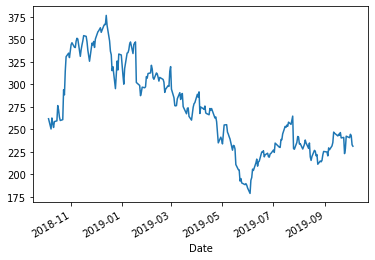

In [155]:
tsla['Adj Close'].plot()

The default size is a little small, so we can add in the figsize argument

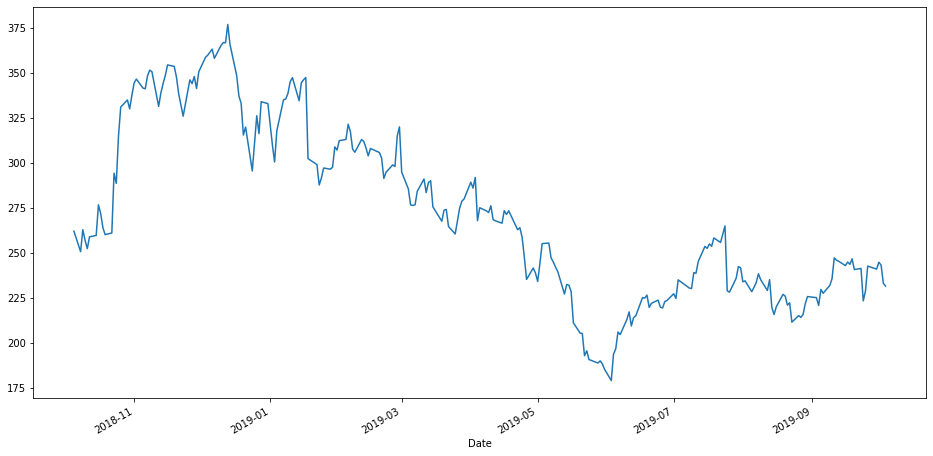

In [156]:
tsla['Adj Close'].plot(figsize=(16, 8))

If we plot a dataframe instead - we get legend information

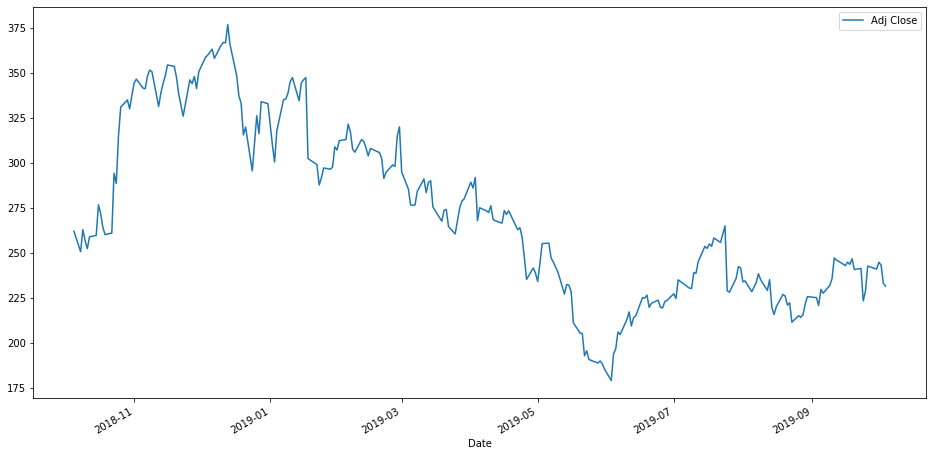

In [157]:
tsla[['Adj Close']].plot(figsize=(16, 8))

## Plotting multiple lines

This is as simple as passing in multiple column names. Note that Pandas required the data to be in 'wide' format to do this

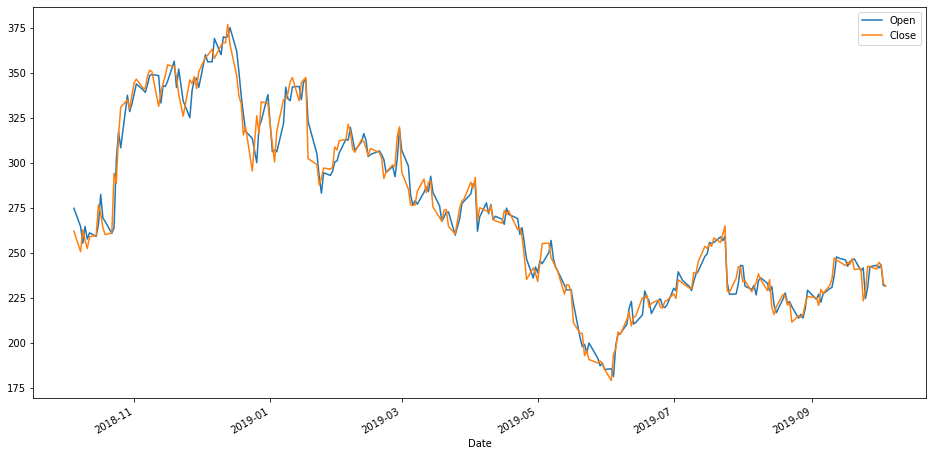

In [158]:
tsla[['Open', 'Close']].plot(figsize=(16, 8))

## Multiple assignments and transform

Here we want to get information about the starting price of the stock each month. In order to do this:

* We first need to get the year and month information from the index
* The we perform a `transform` operation based on the year/month groupings
    * This is called a 'Window Function' - and also makes use of group by
    * Here we are using a built in function called `first`
    * We are also explicitly sorting by the index to ensure the ordering is correct
    * This might not be necessary - but I like to be sure!

In [159]:
tsla['year'] = tsla.index.year

In [160]:
tsla['month'] = tsla.index.month

In [161]:
tsla['ACMS'] = tsla.sort_index().groupby(['year', 'month'])['Adj Close'].transform('first')

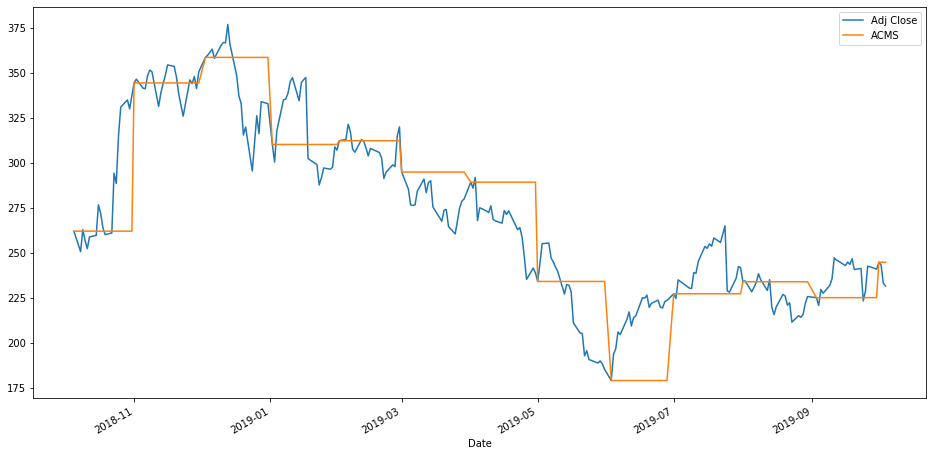

In [162]:
tsla[['Adj Close', 'ACMS']].plot(figsize=(16, 8))

## Multiple assignments

It is possible to do all of the new columns in a single chain of functions using the `assign` operator

In [163]:
tsla = pd.read_csv('data/TSLA.csv', index_col='Date', parse_dates=True)

In [164]:
tsla_first = (
    tsla
    .assign(year = lambda df: df.index.year)
    .assign(month = lambda df: df.index.month)
    .assign(ACMS = lambda df: df.groupby(['year', 'month'])['Adj Close'].transform('first'))
)

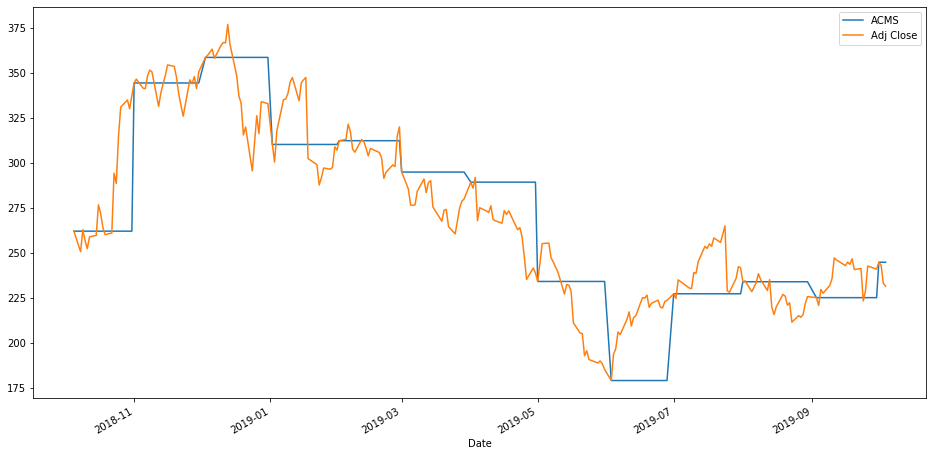

In [165]:
tsla_first[['ACMS', 'Adj Close']].plot(figsize=(16, 8))

If you wish to use strings for the column names instead, you can use the `**` syntax to 'unpack' a dictionary into keyword arguments

In [166]:
tsla_first = (
    tsla
    .assign(**{'year': lambda df: df.index.year, 'month': lambda df: df.index.month})
    .assign(**{'ACMS': lambda df: df.groupby(['year', 'month'])['Adj Close'].transform('first')})
)

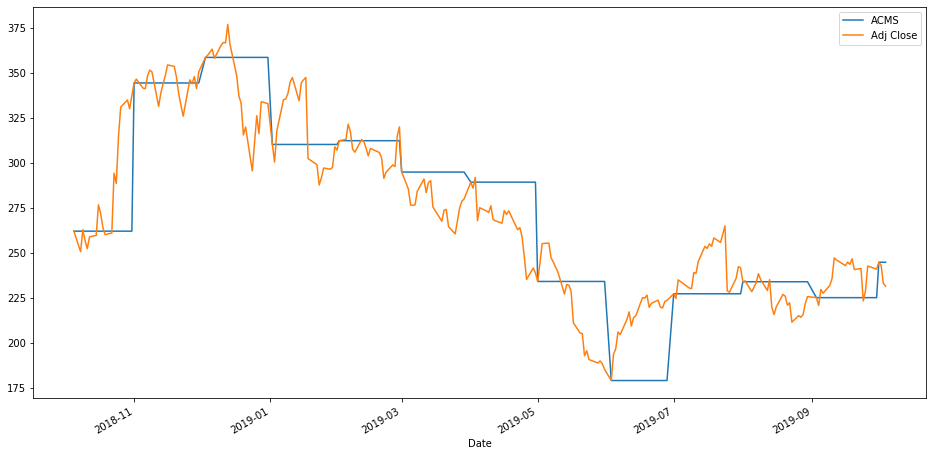

In [167]:
tsla_first[['ACMS', 'Adj Close']].plot(figsize=(16, 8))

# Combining information from 2 dataframes

If the indices or the columns are the same between 2 dataframes - they can be concatenated.

In [168]:
df1_ind = pd.DataFrame({'one': [1, 2, 3, 4], 'two': [4, 3, 2, 1]}, index=['a', 'b', 'c', 'd'])

In [169]:
df2_ind = pd.DataFrame({'three': ['one', 'two', 'three', 'four'], 'four': ['four', 'three', 'two', 'one']}, index=['a', 'b', 'c', 'd'])

In [170]:
df_ind = pd.concat([df1_ind, df2_ind], axis=1)

In [171]:
df_ind

,one,two,three,four
a,1,4,one,four
b,2,3,two,three
c,3,2,three,two
d,4,1,four,one


In [172]:
df1_col = pd.DataFrame({'one': [1, 2, 3, 4], 'two': [4, 3, 2, 1]}, index=['a', 'b', 'c', 'd'])

In [173]:
df2_col = pd.DataFrame({'one': [5, 6, 7, 8], 'two': [8, 7, 6, 5]}, index=['e', 'f', 'g', 'h'])

In [174]:
df_col = pd.concat([df1_col, df2_col], axis=0)

In [175]:
df_col

,one,two
a,1,4
b,2,3
c,3,2
d,4,1
e,5,8
f,6,7
g,7,6
h,8,5


## Merging information from 2 dataframes

This is very similar to a database style 'Join' operation. However note that in Pandas - `join` is used exclusively for matching an index

In [176]:
df_customer = pd.DataFrame({
    'customer': ['Kate', 'Sarah', 'Dave'],
    'planet': ['Jupyter', 'Saturn', 'Mars']
})

In [177]:
df_orders = pd.DataFrame({
    'customer': ['Sarah', 'Dave', 'Del Boy'],
    'order': ['Extra rings', 'bars', 'reliant robin']
})

## Types of joins:

* Inner - the default - only matching rows will be kept
* Left - everything in the left dataframe will stay
* Right - same as above but for the right dataframe
* Outer - all rows kept!

Notice the introduction of NaNs where there is missing information.

In [178]:
df_inner = df_customer.merge(df_orders, on='customer')
df_inner

,customer,planet,order
0,Sarah,Saturn,Extra rings
1,Dave,Mars,bars


In [179]:
df_left = df_customer.merge(df_orders, on='customer', how='left')
df_left

,customer,planet,order
0,Kate,Jupyter,NaN
1,Sarah,Saturn,Extra rings
2,Dave,Mars,bars


In [180]:
df_right = df_customer.merge(df_orders, on='customer', how='right')
df_right

,customer,planet,order
0,Sarah,Saturn,Extra rings
1,Dave,Mars,bars
2,Del Boy,NaN,reliant robin


In [181]:
df_outer = df_customer.merge(df_orders, on='customer', how='outer')
df_outer

,customer,planet,order
0,Kate,Jupyter,NaN
1,Sarah,Saturn,Extra rings
2,Dave,Mars,bars
3,Del Boy,NaN,reliant robin


## Extra notes on merge:

* You can merge on multiple columns
* The column names do not have to match - you can use the arguments `left_on` and `right_on`
* You need to be careful if you have duplicates of the same information

In [182]:
df_customer2 = pd.DataFrame({
    'customer': ['Kate', 'Sarah', 'Dave', 'Dave'],
    'planet': ['Jupyter', 'Saturn', 'Mars', 'Venus']
})

In [183]:
df_orders2 = pd.DataFrame({
    'customer': ['Sarah', 'Dave', 'Del Boy', 'Dave'],
    'order': ['Extra rings', 'bars', 'reliant robin', 'shavers']
})

In [184]:
df_customer2.merge(df_orders2, on='customer')

,customer,planet,order
0,Sarah,Saturn,Extra rings
1,Dave,Mars,bars
2,Dave,Mars,shavers
3,Dave,Venus,bars
4,Dave,Venus,shavers
